In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/cars45_data.csv')
df.head()

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,"₦ 10,500,000",Petrol,Automatic,Mercedes-Benz,CLA-Class,2014.0,White,Foreign Used,210544.0,2000.0,Imported,Imported,Mercedes-Benz CLA-Class 2014 White,NaN,NaN,NaN,NaN,NaN,NaN
1,"₦ 22,050,000",Petrol,Automatic,BMW,X4,2015.0,Brown,Local Used,20655.0,2000.0,Registered,Registered,BMW X4 2015 Brown,NaN,NaN,NaN,NaN,NaN,NaN
2,"₦ 6,930,000",Petrol,Automatic,Toyota,Corolla,2009.0,Gold,Local Used,97225.0,1800.0,Registered,Registered,Toyota Corolla 2009 Gold,NaN,NaN,NaN,NaN,NaN,Abuja
3,"₦ 13,125,009",Petrol,Automatic,Chevrolet,Tahoe,2007.0,Black,Local Used,266868.0,5300.0,Registered,Imported,Chevrolet Tahoe 2007 Black,NaN,NaN,NaN,NaN,NaN,Lagos
4,"₦ 10,500,000",Petrol,Automatic,Mini,Cooper,2013.0,Black,Local Used,154962.0,1600.0,Registered,Imported,Mini Cooper John Cooper Works 2013 Black,John Cooper Works,Front Wheel,4,4.0,211.0,NaN


In [4]:
df.shape

(2608, 19)

In [5]:
df['gear type'].unique()

array(['Automatic', nan, 'Manual', 'CVT', 'AMT'], dtype=object)

In [6]:
df.columns

Index(['price', 'fuel type', 'gear type', 'Make', 'Model',
       'Year of manufacture', 'Colour', 'Condition', 'Mileage', 'Engine Size',
       'Selling Condition', 'Bought Condition', 'car', 'Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'],
      dtype='object')

## Features

### Data from Cars 45 website

- PRICE : The price of the car in naira
- FUEL TYPE : petrol, hybrid, diesel, CNG
- GEAR TYPE : Automatic, CVT, Manual, AMT
- MAKE : make of the car or the brand name
- MODEL : specific model of the car
- YEAR OF MANUFACTURE : 
- COLOUR : 
- CONDITION : Locally used or foreign used
- MILEAGE : distance the car has travelled in its lifetime in kilometers
- ENGINE SIZE
- SELLING CONDITION : Registered, Imported, Brand new
- BOUGHT CONDITION : Registered, Imported, Brand new
- CAR : Full car name with model and make
- TRIM : car detail that state interior and exterior features
- DRIVETRAIN : AWD, RWD, etc
- SEATS : number of seats
- NUMBER OF CYLINDERS
- HORSE POWER
- REGISTERED CITY : registered city

In [7]:
df.isna().sum()

price                     0
fuel type                 8
gear type                 8
Make                      8
Model                     8
Year of manufacture       8
Colour                    8
Condition                 8
Mileage                  60
Engine Size              72
Selling Condition         9
Bought Condition          9
car                       0
Trim                   2301
Drivetrain             2319
Seats                  2339
Number of Cylinders    2326
Horse Power            2346
Registered city        1234
dtype: int64

In [8]:
df.drop(columns=['Trim', 'Drivetrain',
       'Seats', 'Number of Cylinders', 'Horse Power', 'Registered city'], inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

In [11]:
df.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

In [12]:
df.shape

(2483, 13)

In [13]:
df.nunique()

price                   651
fuel type                 4
gear type                 4
Make                     43
Model                   268
Year of manufacture      33
Colour                   16
Condition                 3
Mileage                2206
Engine Size              44
Selling Condition         3
Bought Condition          3
car                    1687
dtype: int64

In [14]:
df['Bought Condition'].value_counts()

Bought Condition
Imported      1395
Registered    1014
Brand new       74
Name: count, dtype: int64

In [15]:
df['Year of manufacture'] = df['Year of manufacture'].astype(int)

In [16]:
df['price'] = pd.to_numeric(df['price'].str.replace('₦', '').str.replace(',', ''))

In [17]:
# Specify the column to check for outliers
column = ['price']
for column in column:
    # Compute IQR for the chosen column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers based on the chosen column
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

print(df)

         price fuel type  gear type           Make      Model  \
0     10500000    Petrol  Automatic  Mercedes-Benz  CLA-Class   
1     22050000    Petrol  Automatic            BMW         X4   
2      6930000    Petrol  Automatic         Toyota    Corolla   
3     13125009    Petrol  Automatic      Chevrolet      Tahoe   
4     10500000    Petrol  Automatic           Mini     Cooper   
...        ...       ...        ...            ...        ...   
2603   5250000    Petrol  Automatic          Honda    Element   
2604   2520000    Petrol  Automatic  Mercedes-Benz    M Class   
2605   3360000    Petrol  Automatic         Toyota     Solara   
2606   2100000    Petrol  Automatic          Honda     Accord   
2607   2100000    Petrol     Manual     Volkswagen       Golf   

      Year of manufacture  Colour     Condition   Mileage  Engine Size  \
0                    2014   White  Foreign Used  210544.0       2000.0   
1                    2015   Brown    Local Used   20655.0       2000.0 

In [18]:
df.isna().sum()

price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
dtype: int64

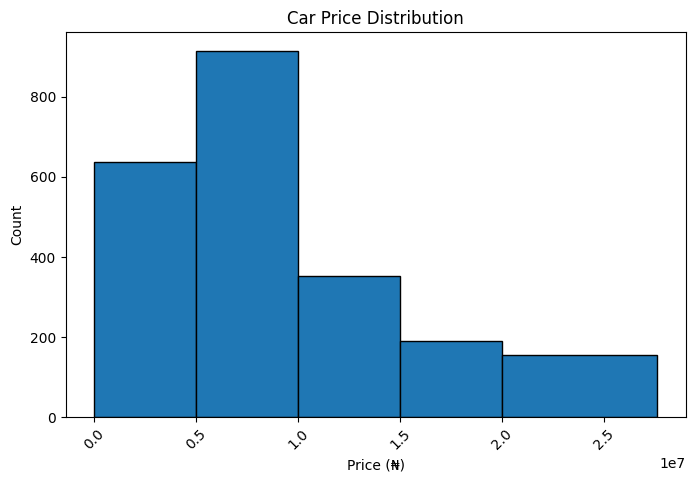

In [19]:
plt.figure(figsize=(8,5))
plt.hist(df['price'], bins=[0, 5000000,10000000,15000000,20000000,df['price'].max()], edgecolor='black')
plt.title("Car Price Distribution")
plt.xlabel("Price (₦)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

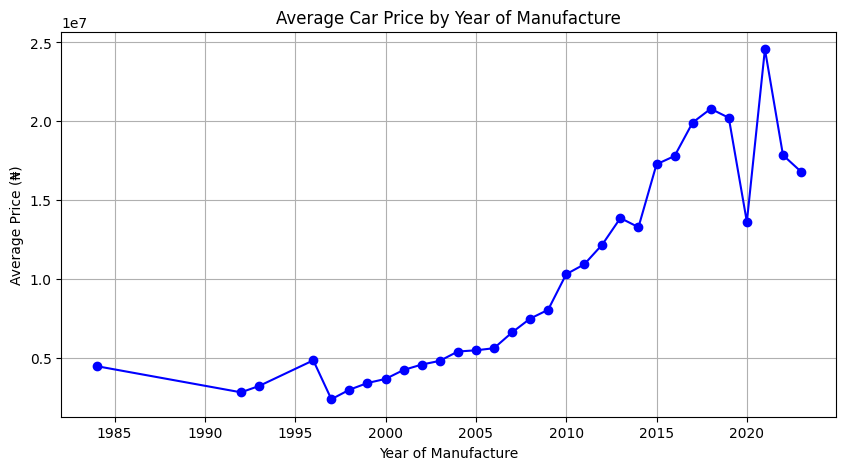

In [20]:
yearly_avg_price = df.groupby('Year of manufacture')['price'].mean()
plt.figure(figsize=(10,5))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', color='b')
plt.title("Average Car Price by Year of Manufacture")
plt.xlabel("Year of Manufacture")
plt.ylabel("Average Price (₦)")
plt.grid(True)
plt.show()

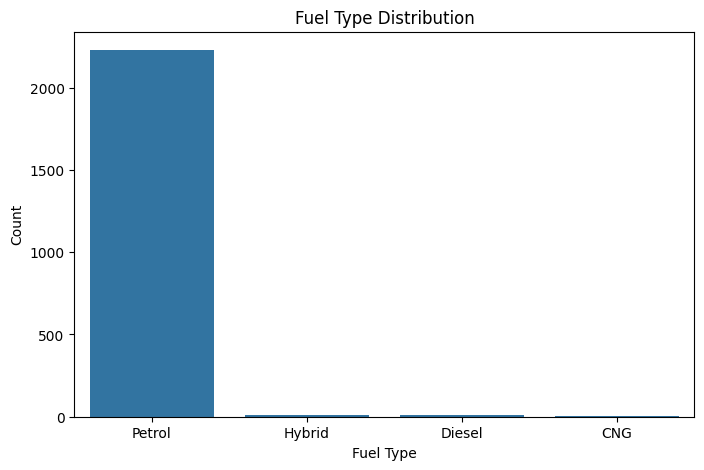

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['fuel type'], order=df['fuel type'].value_counts().index)
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()

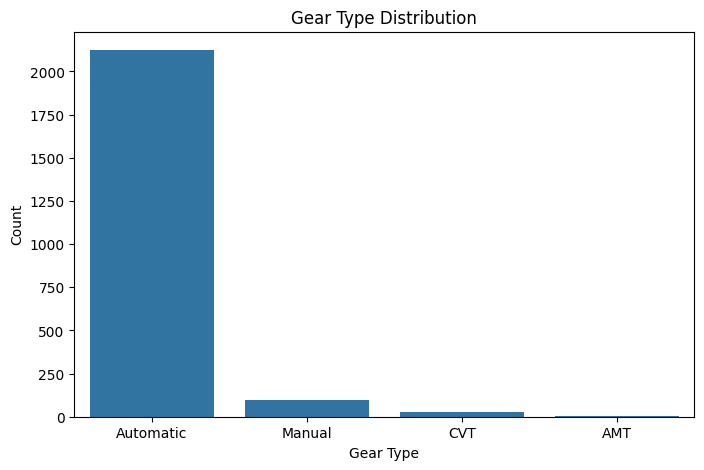

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['gear type'], order=df['gear type'].value_counts().index)
plt.title("Gear Type Distribution")
plt.xlabel("Gear Type")
plt.ylabel("Count")
plt.show()

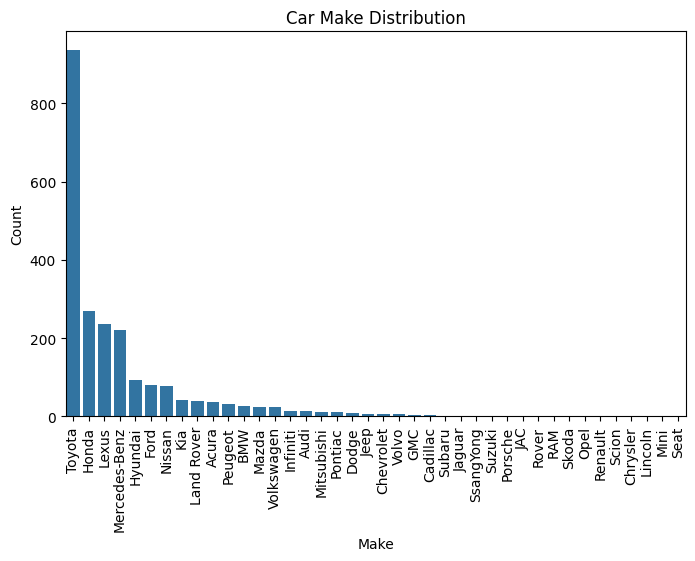

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Make'], order=df['Make'].value_counts().index)
plt.title("Car Make Distribution")
plt.xlabel("Make")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [24]:
df.head()

,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car
0,10500000,Petrol,Automatic,Mercedes-Benz,CLA-Class,2014,White,Foreign Used,210544.0,2000.0,Imported,Imported,Mercedes-Benz CLA-Class 2014 White
1,22050000,Petrol,Automatic,BMW,X4,2015,Brown,Local Used,20655.0,2000.0,Registered,Registered,BMW X4 2015 Brown
2,6930000,Petrol,Automatic,Toyota,Corolla,2009,Gold,Local Used,97225.0,1800.0,Registered,Registered,Toyota Corolla 2009 Gold
3,13125009,Petrol,Automatic,Chevrolet,Tahoe,2007,Black,Local Used,266868.0,5300.0,Registered,Imported,Chevrolet Tahoe 2007 Black
4,10500000,Petrol,Automatic,Mini,Cooper,2013,Black,Local Used,154962.0,1600.0,Registered,Imported,Mini Cooper John Cooper Works 2013 Black


In [25]:
cols_to_drop = ['car', 'Model', 'Colour']
df.drop(['Bought Condition', 'Selling Condition'], axis=1, inplace=True)
df.drop(cols_to_drop, axis=1, inplace=True)

In [26]:
df.head()

,price,fuel type,gear type,Make,Year of manufacture,Condition,Mileage,Engine Size
0,10500000,Petrol,Automatic,Mercedes-Benz,2014,Foreign Used,210544.0,2000.0
1,22050000,Petrol,Automatic,BMW,2015,Local Used,20655.0,2000.0
2,6930000,Petrol,Automatic,Toyota,2009,Local Used,97225.0,1800.0
3,13125009,Petrol,Automatic,Chevrolet,2007,Local Used,266868.0,5300.0
4,10500000,Petrol,Automatic,Mini,2013,Local Used,154962.0,1600.0


In [27]:
df.to_csv('data/cars45_data_cleaned.csv', index=False)

In [28]:
df

,price,fuel type,gear type,Make,Year of manufacture,Condition,Mileage,Engine Size
0,10500000,Petrol,Automatic,Mercedes-Benz,2014,Foreign Used,210544.0,2000.0
1,22050000,Petrol,Automatic,BMW,2015,Local Used,20655.0,2000.0
2,6930000,Petrol,Automatic,Toyota,2009,Local Used,97225.0,1800.0
3,13125009,Petrol,Automatic,Chevrolet,2007,Local Used,266868.0,5300.0
4,10500000,Petrol,Automatic,Mini,2013,Local Used,154962.0,1600.0
...,...,...,...,...,...,...,...,...
2603,5250000,Petrol,Automatic,Honda,2004,Local Used,159250.0,2400.0
2604,2520000,Petrol,Automatic,Mercedes-Benz,2000,Local Used,228834.0,3500.0
2605,3360000,Petrol,Automatic,Toyota,2004,Local Used,166642.0,2400.0
2606,2100000,Petrol,Automatic,Honda,1997,Local Used,164169.0,2100.0
